In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

/home/wwengm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv('./data/data_combined_budget.csv')
data = data[(data.Runtime >= 50) & (data.Runtime <= 200) & 
            (data.Year >= 1990)]
data.describe()

,Unnamed: 0,Adjusted_BoxOffice,BoxOffice,NLP_Score,Runtime,Year,imdbRating,imdbVotes,Internet_Movie_Database,Rotten_Tomatoes,...,Sport,Thriller,War,Western,Country_count,budget,Adjusted_Budgets,Director_Score,Writer_Score,Actor_Score
count,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9.322000e+03,9322.000000,9322.000000,...,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,3.428000e+03,3428.000000,9322.000000,9322.000000,9322.000000
mean,5777.557069,28.648639,21.948306,9.158985,104.624973,2005.691697,6.378696,5.093996e+04,6.378696,5.706821,...,0.031216,0.204784,0.030573,0.011049,1.535078,3.833468e+07,48.302463,1.346707,0.737980,7.074298
std,3272.476375,64.164851,51.199261,5.261931,17.940863,7.626457,1.004886,1.191995e+05,1.004886,2.639098,...,0.173912,0.403566,0.172167,0.104538,0.974243,4.505118e+07,53.827954,1.062290,0.627913,4.542283
min,0.000000,0.000082,0.000074,1.046110,53.000000,1990.000000,1.100000,6.000000e+00,1.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000e+03,0.009063,0.045814,0.022431,0.621454
25%,2833.250000,0.082429,0.066174,4.624634,92.000000,2000.000000,5.800000,2.052000e+03,5.800000,3.700000,...,0.000000,0.000000,0.000000,0.000000,1.000000,9.200000e+06,11.353044,0.501637,0.356760,3.010948
50%,5973.500000,1.657188,1.250904,8.212019,101.000000,2007.000000,6.500000,9.069500e+03,6.500000,5.940134,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.400000e+07,29.612011,0.990688,0.434675,6.192310
75%,8675.750000,29.015950,21.010307,12.778660,113.000000,2012.000000,7.100000,4.437925e+04,7.100000,8.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000e+07,66.110107,1.865204,0.916846,10.318051
max,11115.000000,1039.048028,936.658640,28.108077,197.000000,2018.000000,9.300000,2.018482e+06,9.300000,10.000000,...,1.000000,1.000000,1.000000,1.000000,16.000000,4.250000e+08,501.035781,6.481680,5.620875,22.635663


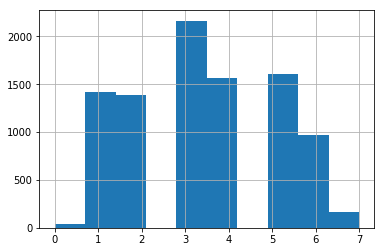

In [3]:
# transfer to category
log_boxoffice = np.log(data['Adjusted_BoxOffice'])
cat_raw = pd.cut(log_boxoffice, [-10,-6,-4,-2,0,2,4,6,10])
all_cats = cat_raw.unique()
cat_encoder = dict([(i,x) for x,i in enumerate(all_cats)])
data['Adjusted_BoxOffice_Cat'] = cat_raw.replace(cat_encoder)
data['Adjusted_BoxOffice_Cat'].hist()

In [4]:
#Baseline Model: A simple logistic regression

data_model1 = data[['Adjusted_BoxOffice_Cat', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count']]

X = data_model1.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model1['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('Baseline Model1: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


data_model2 = data[['Adjusted_BoxOffice_Cat', 'Runtime','Year', 'imdbRating', 'imdbVotes',
       'Internet_Movie_Database', 'Rotten_Tomatoes', 'Metacritic',
       'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count']]

X = data_model2.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model2['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('Baseline Model2: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

Baseline Model1: CV Accuracy: 31.663 | Testing Accuracy: 31.641
Baseline Model2: CV Accuracy: 40.475 | Testing Accuracy: 41.723


In [5]:
# LR with NLP
data_model3 = data[['Adjusted_BoxOffice_Cat', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','NLP_Score']]

X = data_model3.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model3['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('LR(NLP): CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


data_model3a = data[['Adjusted_BoxOffice_Cat', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','Director_Score','Writer_Score','Actor_Score']]


X = data_model3a.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model3a['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('LR(NLP_SeparatedScore): CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

LR(NLP): CV Accuracy: 35.585 | Testing Accuracy: 36.539
LR(NLP_SeparatedScore): CV Accuracy: 36.243 | Testing Accuracy: 36.825


In [6]:
# SVM
data_model4 = data_model3
X = data_model4.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model4['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


svm_clf = svm.SVC(decision_function_shape='ovo')
scores = cross_val_score(svm_clf, X_train, y_train, cv=5)

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('SVM: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


data_model4a = data_model3a
X = data_model4a.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model4a['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


svm_clf = svm.SVC(decision_function_shape='ovo')
scores = cross_val_score(svm_clf, X_train, y_train, cv=5)

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('SVM(NLP_SeparatedScore): CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

SVM: CV Accuracy: 34.682 | Testing Accuracy: 35.967
SVM(NLP_SeparatedScore): CV Accuracy: 34.912 | Testing Accuracy: 36.682


In [7]:
#KNN
data_model5 = data_model3
X = data_model5.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model5['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

neigh = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(neigh, X_train, y_train, cv=5)

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('KNN: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


data_model5a = data_model3a
X = data_model5a.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model5a['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

neigh = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(neigh, X_train, y_train, cv=5)

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('KNN(NLP_SeparatedScore): CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

KNN: CV Accuracy: 31.358 | Testing Accuracy: 32.320
KNN(NLP_SeparatedScore): CV Accuracy: 31.312 | Testing Accuracy: 32.642


In [8]:
#Random Forest

data_model6 = data_model3
X = data_model6.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model6['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('RF: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


data_model6a = data_model3a
X = data_model6a.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model6a['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('RF(NLP_SeparatedScore): CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

RF: CV Accuracy: 36.521 | Testing Accuracy: 38.077
RF(NLP_SeparatedScore): CV Accuracy: 38.297 | Testing Accuracy: 38.577


In [9]:
def one_hot_encoding(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    dummy_y = np_utils.to_categorical(encoded_y)
    return (dummy_y)

data_nn = data_model3

X = data_nn.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_nn['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

dummy_y_train = one_hot_encoding(y_train)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(16, input_dim=data_nn.shape[1]-1, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(all_cats), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, dummy_y_train, batch_size = 50, epochs = 100)

predictions = model.predict_classes(X_test)
y_pred = np.argmax(np_utils.to_categorical(predictions), axis = 1)

train_predictions = model.predict_classes(X_train)
train_y_pred = np.argmax(np_utils.to_categorical(train_predictions), axis = 1)

tst_acc = accuracy_score(y_test, y_pred)
tr_acc = accuracy_score(y_train, train_y_pred)
print('NN: Train Accuracy: %0.3f | Testing Accuracy: %0.3f' % (tr_acc,tst_acc))



data_nna = data_model3a

X = data_nna.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_nna['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

dummy_y_train = one_hot_encoding(y_train)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(16, input_dim=data_nna.shape[1]-1, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(all_cats), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, dummy_y_train, batch_size = 50, epochs = 100)

predictions = model.predict_classes(X_test)
y_pred = np.argmax(np_utils.to_categorical(predictions), axis = 1)

train_predictions = model.predict_classes(X_train)
train_y_pred = np.argmax(np_utils.to_categorical(train_predictions), axis = 1)

tst_acc = accuracy_score(y_test, y_pred)
tr_acc = accuracy_score(y_train, train_y_pred)
print('NN(NLP_SeparatedScore): Train Accuracy: %0.3f | Testing Accuracy: %0.3f' % (tr_acc,tst_acc))

Epoch 1/100
6525/6525 [==============================] - 1s 111us/step - loss: 1.9553 - acc: 0.2193
Epoch 2/100
6525/6525 [==============================] - 0s 51us/step - loss: 1.7570 - acc: 0.2932
Epoch 3/100
6525/6525 [==============================] - 0s 51us/step - loss: 1.6533 - acc: 0.3269
Epoch 4/100
6525/6525 [==============================] - 0s 51us/step - loss: 1.5941 - acc: 0.3473
Epoch 5/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.5589 - acc: 0.3580
Epoch 6/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.5395 - acc: 0.3664
Epoch 7/100
6525/6525 [==============================] - 0s 61us/step - loss: 1.5245 - acc: 0.3744
Epoch 8/100
6525/6525 [==============================] - 0s 59us/step - loss: 1.5152 - acc: 0.3787
Epoch 9/100
6525/6525 [==============================] - 0s 58us/step - loss: 1.5080 - acc: 0.3767
Epoch 10/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.5006 - acc: 0.3818
Epoch 11

6525/6525 [==============================] - 0s 50us/step - loss: 1.4145 - acc: 0.4207
Epoch 84/100
6525/6525 [==============================] - 0s 50us/step - loss: 1.4141 - acc: 0.4146
Epoch 85/100
6525/6525 [==============================] - 0s 55us/step - loss: 1.4137 - acc: 0.4176
Epoch 86/100
6525/6525 [==============================] - 0s 53us/step - loss: 1.4125 - acc: 0.4113
Epoch 87/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.4128 - acc: 0.4138
Epoch 88/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.4119 - acc: 0.4208
Epoch 89/100
6525/6525 [==============================] - 0s 48us/step - loss: 1.4120 - acc: 0.4153
Epoch 90/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.4118 - acc: 0.4172
Epoch 91/100
6525/6525 [==============================] - 0s 48us/step - loss: 1.4120 - acc: 0.4136
Epoch 92/100
6525/6525 [==============================] - 0s 51us/step - loss: 1.4110 - acc: 0.4199
Epoch 93/100


6525/6525 [==============================] - 0s 52us/step - loss: 1.3949 - acc: 0.4169
Epoch 65/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.3941 - acc: 0.4205
Epoch 66/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.3949 - acc: 0.4192
Epoch 67/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.3931 - acc: 0.4193
Epoch 68/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.3925 - acc: 0.4164
Epoch 69/100
6525/6525 [==============================] - 0s 50us/step - loss: 1.3933 - acc: 0.4181
Epoch 70/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.3917 - acc: 0.4208
Epoch 71/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.3915 - acc: 0.4185
Epoch 72/100
6525/6525 [==============================] - 0s 48us/step - loss: 1.3910 - acc: 0.4199
Epoch 73/100
6525/6525 [==============================] - 0s 49us/step - loss: 1.3895 - acc: 0.4182
Epoch 74/100


In [10]:
data_budget = data[data.Adjusted_Budgets.notna()]
data_budget['log_Adjusted_Budgets'] = np.log(data_budget['Adjusted_Budgets'] )
data_budget.describe()

/home/wwengm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,Adjusted_BoxOffice,BoxOffice,NLP_Score,Runtime,Year,imdbRating,imdbVotes,Internet_Movie_Database,Rotten_Tomatoes,...,War,Western,Country_count,budget,Adjusted_Budgets,Director_Score,Writer_Score,Actor_Score,Adjusted_BoxOffice_Cat,log_Adjusted_Budgets
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3.428000e+03,3428.000000,3428.000000,...,3428.000000,3428.000000,3428.000000,3.428000e+03,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,3804.012835,61.228251,48.081917,11.762070,107.611435,2006.094807,6.404259,1.103732e+05,6.404259,5.317272,...,0.031505,0.012252,1.567970,3.833468e+07,48.302463,1.714490,0.873312,9.174269,2.403442,3.129973
std,2501.695798,86.387795,69.499904,5.321263,18.158049,6.760831,1.006750,1.702775e+05,1.006750,2.710814,...,0.174704,0.110025,0.963768,4.505118e+07,53.827954,1.184290,0.700502,4.642016,1.296787,1.527367
min,0.000000,0.000528,0.000423,1.429214,59.000000,1990.000000,1.900000,4.000000e+01,1.900000,0.000000,...,0.000000,0.000000,1.000000,6.000000e+03,0.009063,0.045814,0.022431,0.742888,0.000000,-4.703546
25%,2078.750000,6.298624,4.781412,7.635184,95.000000,2001.000000,5.800000,1.691225e+04,5.800000,3.000000,...,0.000000,0.000000,1.000000,9.200000e+06,11.353044,0.791108,0.373012,5.552175,1.000000,2.429481
50%,3355.000000,31.483658,24.576919,11.581251,104.000000,2006.000000,6.500000,5.235550e+04,6.500000,5.500000,...,0.000000,0.000000,1.000000,2.400000e+07,29.612011,1.444708,0.663881,9.005369,3.000000,3.388176
75%,5228.500000,78.414700,60.600000,15.530408,117.000000,2012.000000,7.100000,1.286035e+05,7.100000,7.700000,...,0.000000,0.000000,2.000000,5.000000e+07,66.110107,2.361660,1.150673,12.605363,3.000000,4.191322
max,11104.000000,1039.048028,749.700000,28.108077,194.000000,2018.000000,9.300000,2.018482e+06,9.300000,10.000000,...,1.000000,1.000000,16.000000,4.250000e+08,501.035781,6.481680,5.620875,21.915807,7.000000,6.216678


/home/wwengm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/wwengm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


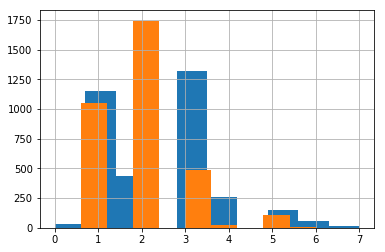

In [11]:
log_boxoffice = np.log(data_budget['Adjusted_BoxOffice'])
cat_raw = pd.cut(log_boxoffice, [-10,-6,-4,-2,0,2,4,6,10])
all_cats = cat_raw.unique()
cat_encoder = dict([(i,x) for x,i in enumerate(all_cats)])
data_budget['Adjusted_BoxOffice_Cat'] = cat_raw.replace(cat_encoder)
data_budget['Adjusted_BoxOffice_Cat'].hist()

log_Adjusted_Budgets = np.log(data_budget['Adjusted_Budgets'])
cat_raw = pd.cut(log_Adjusted_Budgets, [-10,-6,-4,-2,0,2,4,6,10])
all_cats = cat_raw.unique()
cat_encoder = dict([(i,x) for x,i in enumerate(all_cats)])
data_budget['Adjusted_Budgets_Cat'] = cat_raw.replace(cat_encoder)
data_budget['Adjusted_Budgets_Cat'].hist()

In [12]:
#Random Forest with budget Cat

# data_model7 = data_budget[['Adjusted_BoxOffice_Cat', 'Runtime','Year', 'imdbRating', 'imdbVotes',
#        'Internet_Movie_Database', 'Rotten_Tomatoes', 'Metacritic',
#        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
#        'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
#        'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
#        'Thriller', 'War', 'Western', 'Country_count','NLP_Score','Adjusted_Budgets_Cat']]

# X = data_model7.drop('Adjusted_BoxOffice_Cat',axis = 1)
# y = data_model7['Adjusted_BoxOffice_Cat']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

# rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)
# scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

# rf_clf.fit(X_train, y_train)
# y_pred = rf_clf.predict(X_test)
# tst_acc = accuracy_score(y_test, y_pred) * 100
# cv_acc = np.mean(scores) * 100
# print('RF2: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

In [13]:
# data_model7 = data_budget[['Adjusted_BoxOffice_Cat', 'Runtime','Year', 'imdbRating', 'imdbVotes',
#        'Internet_Movie_Database', 'Rotten_Tomatoes', 'Metacritic',
#        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
#        'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
#        'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
#        'Thriller', 'War', 'Western', 'Country_count','NLP_Score']]

# X = data_model7.drop('Adjusted_BoxOffice_Cat',axis = 1)
# y = data_model7['Adjusted_BoxOffice_Cat']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

# rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)
# scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

# rf_clf.fit(X_train, y_train)
# y_pred = rf_clf.predict(X_test)
# tst_acc = accuracy_score(y_test, y_pred) * 100
# cv_acc = np.mean(scores) * 100
# print('RF2: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

In [14]:
import statsmodels.api as sm

data_budget['log_Adjusted_Budgets'] = np.log(data_budget['Adjusted_Budgets'] )
data_budget['log_Adjusted_BoxOffice'] = np.log(data_budget['Adjusted_BoxOffice'] )

#Baseline Model: A simple Regression

data_model8 = data_budget[['log_Adjusted_BoxOffice', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','log_Adjusted_Budgets']]

X = data_model8.drop('log_Adjusted_BoxOffice',axis = 1)
y = data_model8['log_Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_model1 = sm.OLS(y_train, sm.add_constant(X_train))
lr_est1 = lr_model1.fit()
print(lr_est1.summary())

# Out of Sample
pred = lr_est1.predict(sm.add_constant(X_test))
oosr = 1 - sum([x*x for x in (pred-y_test)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
print('Out of Sample R2 is : %s' %round(oosr,3))

                              OLS Regression Results                              
Dep. Variable:     log_Adjusted_BoxOffice   R-squared:                       0.503
Model:                                OLS   Adj. R-squared:                  0.497
Method:                     Least Squares   F-statistic:                     95.89
Date:                    Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                            00:10:32   Log-Likelihood:                -4739.7
No. Observations:                    2399   AIC:                             9531.
Df Residuals:                        2373   BIC:                             9682.
Df Model:                              25                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

/home/wwengm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/wwengm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
data_model9 = data_budget[['log_Adjusted_BoxOffice', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','log_Adjusted_Budgets','NLP_Score']]

X = data_model9.drop('log_Adjusted_BoxOffice',axis = 1)
y = data_model9['log_Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_model1 = sm.OLS(y_train, sm.add_constant(X_train))
lr_est1 = lr_model1.fit()
print(lr_est1.summary())

# Out of Sample
pred = lr_est1.predict(sm.add_constant(X_test))
oosr = 1 - sum([x*x for x in (pred-y_test)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
print('Out of Sample R2 is : %s' %round(oosr,3))

                              OLS Regression Results                              
Dep. Variable:     log_Adjusted_BoxOffice   R-squared:                       0.507
Model:                                OLS   Adj. R-squared:                  0.502
Method:                     Least Squares   F-statistic:                     94.01
Date:                    Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                            00:10:32   Log-Likelihood:                -4727.7
No. Observations:                    2399   AIC:                             9509.
Df Residuals:                        2372   BIC:                             9666.
Df Model:                              26                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [16]:
data_model10 = data_budget[['log_Adjusted_BoxOffice', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','log_Adjusted_Budgets','Director_Score','Writer_Score','Actor_Score']]

X = data_model10.drop('log_Adjusted_BoxOffice',axis = 1)
y = data_model10['log_Adjusted_BoxOffice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_model1 = sm.OLS(y_train, sm.add_constant(X_train))
lr_est1 = lr_model1.fit()
print(lr_est1.summary())

# Out of Sample
pred = lr_est1.predict(sm.add_constant(X_test))
oosr = 1 - sum([x*x for x in (pred-y_test)])/sum([x*x for x in (sum(y_train)/len(y_train)-y_test)])
print('Out of Sample R2 is : %s' %round(oosr,3))

                              OLS Regression Results                              
Dep. Variable:     log_Adjusted_BoxOffice   R-squared:                       0.513
Model:                                OLS   Adj. R-squared:                  0.507
Method:                     Least Squares   F-statistic:                     89.24
Date:                    Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                            00:10:32   Log-Likelihood:                -4713.7
No. Observations:                    2399   AIC:                             9485.
Df Residuals:                        2370   BIC:                             9653.
Df Model:                              28                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [23]:
data_model11 = data_budget[['Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','Director_Score','Writer_Score','Actor_Score']]

data_model11['Profit_binary'] = data_budget['log_Adjusted_BoxOffice'] - data_budget['log_Adjusted_Budgets'] > 0

X = data_model11.drop('Profit_binary',axis = 1)
y = data_model11['Profit_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('Baseline Model1: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

Baseline Model1: CV Accuracy: 57.563 | Testing Accuracy: 58.892


/home/wwengm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
